# Assignment 2 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Dimensionality Reduction`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified. Libraries allowed (Numpy, matplotlib)

## Datasets 
- The IIIT-CFW is database for the cartoon faces in the wild. The dataset contains 8928 annotated cartoon faces of famous personalities of the world with varying profession. Additional 1000 real faces of the public figure to study cross modal retrieval tasks, such as, Photo2Cartoon retrieval. Ref - https://cvit.iiit.ac.in/research/projects/cvit-projects/cartoonfaces
- We have sub sampled the following data for this assignment - Cartoon faces of 8 subjects and approx. 100 images for each subject. 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q3.ipynb`.

In [2]:
# Installing Pillow Libraries
# !pip install scikit-learn matplotlib Pillow

In [3]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image

## Load Data

In [4]:
cfw_dict = {
    'AamirKhan': 1,
    'AishwaryaRai': 3,
    'Amitabhbachan': 0,
    'BarackObama': 4,
    'DwayneJohnson': 2,
    'ManmohanSingh': 6,
    'NarendraModi': 5,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [5]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [6]:
dirpath = './IIIT-CFW/'
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


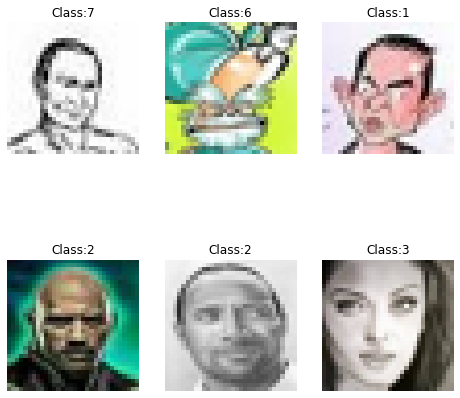

672 32 32


In [7]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],6)
display_images(X[ind,...],y[ind], row=2,col=3)
print(N, H, W)

## Dimensionality Reduction
- Plot eigen spectrum for the data.

Percentage of variance preserved is defined as the fraction of eigen values used. As we include more principal components to describe the data, the percentage of variances preserved under the dimensionality reduction increases. 

- Plot the percentage of variances vs the number of principal components to validate the above statement.
- Try visualizing these eigen vectors. Comment on what these ghost faces represent 
- Try reconstructing images with your choice of number of principal components and visualize the reconstructed image.

Let's define reconstruction error as the frobenius norm of the difference between original and reconstructed image. 

- Plot the number of principal components vs the corresponding reconstruction error for 5 selected number of principal components of your choice.
- Using the two dominant principal values, plot the data with colors showing the labels. What do you observe?


#### Write a function that gives eigen values and eigen vectors given data

In [8]:
# write function
x = X.copy()
flat_x = np.ravel(X[0])
for i in range(1, len(X)):
    flat_x = np.vstack((flat_x, np.ravel(X[i])))

X = np.transpose(flat_x)
cov_matrix = np.cov(X)
X = X.transpose()
# cov_matrix.shape

u, s, v = np.linalg.svd(cov_matrix)
u = u.transpose()

#### Compute eigen values and plot eigen value spectrum

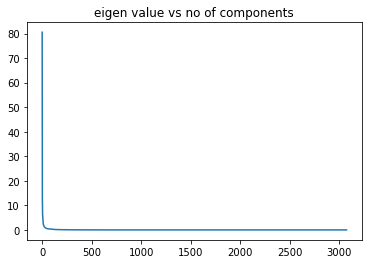

In [9]:
# eigen values and spectrum
plt.plot(np.arange(u.shape[0]), s)
plt.title('eigen value vs no of components')
plt.show()

# reconstruction = np.matmul(X, np.transpose(u[:100,:]))
# print(reconstruction.shape)

#### Plot the percentage of variances vs the number of principal components

[]

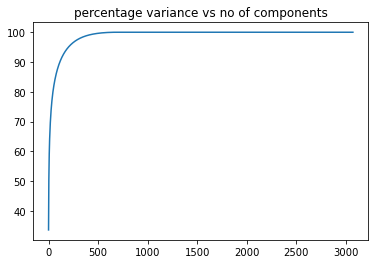

In [10]:
# plot variance vs components
percentages = np.zeros((len(u)), dtype=np.float32)
sum = 0
for i in range(len(s)):
    sum += s[i]
    percentages[i] = sum
percentages /= (sum/100)
plt.plot(np.arange(s.shape[0]), percentages)
plt.title('percentage variance vs no of components')
plt.plot()


#### Visualize eigen faces(eigen vectors)

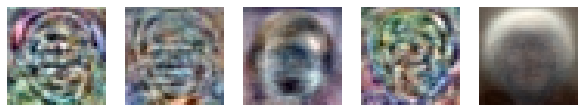

In [11]:
# Use the below sample code to visualize the eigen faces and reconstructed images (can write your own function as well)

def plot(image,H,W,C,indices):
    #indices = [randrange(100)+1 for i in range(5)]
    pl = np.reshape(image.T,(-1,H,W,C))
    plt.figure(figsize=(25,25))
    for c,i in enumerate(indices):
        ele = pl[i]
        minim = np.min(ele)
        maxim = np.max(ele)
        ele = (ele - minim) / (maxim - minim)
        ele = np.clip(ele,0,254)
        plt.subplot(1,12,c+1)
        plt.axis('off')
        plt.imshow(ele,cmap=plt.cm.gray)
    plt.show()

indices = [randrange(120)+1 for i in range(5)]
plot(u.transpose(),32,32,C, indices)

#### Reconstruction 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


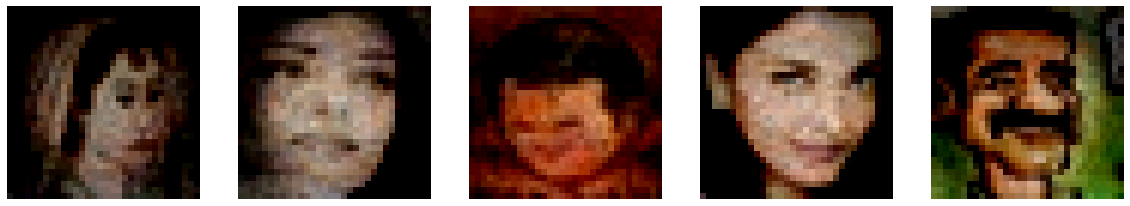

In [12]:
# reconstruction
def reconstruct(k, image):
    global u, s, X
    coeff = u[:k,:].dot(np.transpose(X[image]))
    img = coeff[image]*u[image]
    for i in range(1, len(coeff)):
        img += coeff[i]*u[i]
    img = img.reshape((32, 32, 3))
    return img

plt.figure(figsize=(20, 20))
for i in range(len(indices)):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(reconstruct(300, indices[i]))
plt.show()

#### Plot data in 2D

[8.05321772e+01 1.99819287e+01 1.29505097e+01 ... 3.38025875e-15
 3.33453318e-15 8.41211302e-16]
(672, 2)


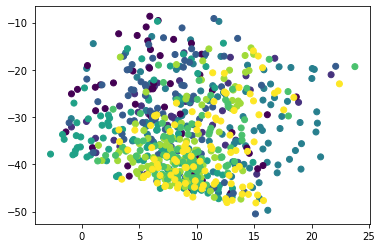

In [13]:
# plot data in 2D
print(s, )
data = np.matmul(X, np.transpose(u[:2,:]))
print(data.shape)
plt.scatter(data[:,1],data[:,0],c=y)
plt.plot()
plt.show()

### Frobenius norm

Let's define reconstruction error as the frobenius norm of the difference between original and reconstructed image. 

- Plot the number of principal components vs the corresponding reconstruction error for 5 selected number of principal components of your choice.
- Using the two dominant principal values, plot the data with colors showing the labels. What do you observe?

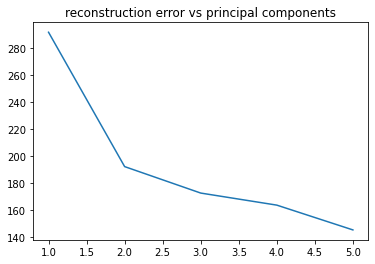

In [26]:
def reconstruct(k, image):
    global u, s, X
    coeff = u[:k,:].dot(np.transpose(X[image]))
    # print(coeff.shape, u.shape)
    img = coeff[0]*u[image]
    for i in range(1, len(coeff)):
        img += coeff[i]*u[i]
    img = img.reshape((32, 32, 3))
    return img

def reconstructionError(real, indices, ii):
    a = real**2
    ar = []
    for i in indices:
        recon_img = reconstruct(i, ii)
        recon_img = recon_img.ravel()
        b = recon_img**2
        ar.append(np.abs(np.sum(a)-np.sum(b)))
    return ar

sums = [0, 0, 0, 0, 0]
for i in range(len(X)):
    ar = reconstructionError(X[i], [1, 2, 3, 4, 5], i) 
    for j in range(5):
        sums[j] += ar[j]

for i in range(5):
    sums[i] /= 672

plt.plot([1, 2, 3, 4, 5], sums)
plt.title('reconstruction error vs principal components')
plt.show()

## Lets analyze the principal components classwise
- Visualize dominant eigen faces of each of the classes.
- Print the number of principal components required to retain 90% variance for each of the classes and for the entire dataset
- Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

Example output:
```
Number of principal components required for 90% reconstruction of the:
Entire Dataset = 10 
Amitabhbachan = 10
AamirKhan = 10
...
```

#### Visualize dominant eigen faces of each of the classes

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)
AamirKhan


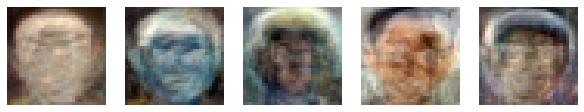

We need 24 components to retain 90% variance
AishwaryaRai


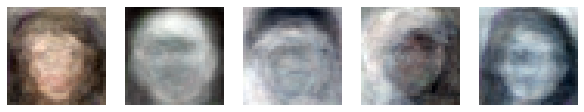

We need 36 components to retain 90% variance
Amitabhbachan


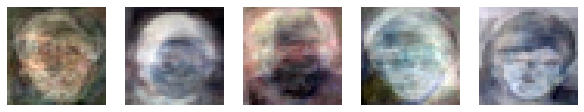

We need 21 components to retain 90% variance
BarackObama


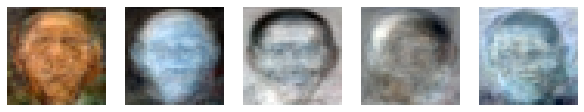

We need 43 components to retain 90% variance
DwayneJohnson


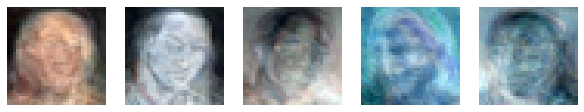

We need 28 components to retain 90% variance
ManmohanSingh


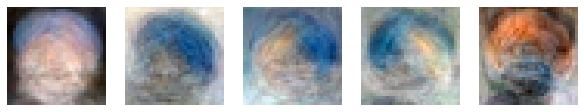

We need 50 components to retain 90% variance
NarendraModi


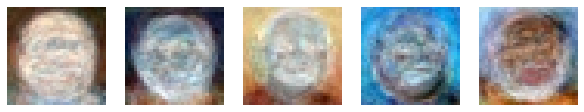

We need 57 components to retain 90% variance
VladimirPutin


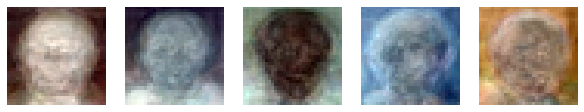

We need 44 components to retain 90% variance


In [ ]:
# Load data again
def threshold_components(s):
    sum = 0
    total = np.sum(s)
    for i in range(len(s)):
        sum += s[i]
        if sum/total > 0.900:
            print("We need", i+1, "components to retain 90% variance")
            break

X,y = load_data(dirpath)
images_count = [0, 42, 42+101, 42+101+50, 193+100, 293+79, 372+100, 472+100, 572+100]
def computeEigenFaces(images, k):
    flat_x = np.ravel(images[0])
    for i in range(1, len(images)):
        flat_x = np.vstack((flat_x, np.ravel(images[i])))

    images = np.transpose(flat_x)
    cov_matrix = np.cov(images)
    images = images.transpose()
    # cov_matrix.shape

    u, s, v = np.linalg.svd(cov_matrix)
    u = u.transpose()
    plot(u.transpose(), 32, 32, C, np.arange(start=0, stop=k, step=1, dtype=np.int16))
    threshold_components(s)

count = 0
for name in cfw_dict:
    print(name)
    i = count
    count += 1
    computeEigenFaces(X[images_count[i]:images_count[i+1],:], 5)
    

#### Number of principal components required to retain 90% variance for each of the classes and for the entire dataset

In [ ]:
# components required
threshold_components(s)


We need 115 components to retain 90% variance


#### Analysis : Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

The number of components are **not** the same since all the types of images are not the same. Some image classes are generalized by less components since they have more common features as compared to other classes

## Linear Regression (continued)
1. Perform linear regression on below datapoints
2. Use PCA for dimensionality reduction on this datapoints and then perform Linear regression.
3. Perform this experiment on different number of components and report the score for linear regression. Plot the graph of [1-200] principal components vs regression score. What do you observe?

Note :- Can use inbuilt functions for Linear Regression and PCA for this question

In [15]:
# datapoints
X,_ = load_data(dirpath)
X = X.reshape((X.shape[0],-1))
label = np.array([randrange((32*32*3)) for i in range(5)])
label = np.mean(X[:,label], axis = 1)
print(label.shape)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)
(672,)


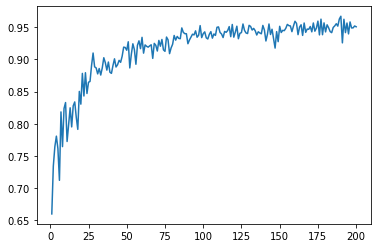

In [16]:
# code here
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
# print(X.shape)
# new_X = pca.fit_transform(X)
model = LinearRegression().fit(X, label)
score_all = model.score(X, label)
def applyLinReg(X, dim):
    pca = PCA(n_components=dim)
    new_X = pca.fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(new_X, label)
    model = LinearRegression().fit(x_train, y_train)
    return model.score(x_test, y_test)

scores = []
for i in range(1, 201):
    scores.append(applyLinReg(X, i))

plt.plot(np.arange(start = 1, stop=201, step=1, dtype=np.int16), scores)
plt.show()


In [ ]:
# analysis / plot (split the cells if required)